**This notebook tests a function that takes in initial tracks for both the CPM and observations and determines whether the same MCS can be seen in both datasets. It returns the unique cell numbers of the MCSs that are colocated in time and space between the 2 datasets**

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches

In [227]:
## Load in the initial tracks for the CPM-Hindcast and the satellite observations
all_years_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/all_years_original.hdf', 'table')
all_years_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/init_tracks_obs/all_years_initial_obs.hdf', 'table')

In [228]:
## Remove 1998-2000 from CPM for comparison with satellite observations
all_years_cpm = all_years_cpm[all_years_cpm.datetime.dt.year > 2000]

In [229]:
## Remove cell = -1 from dataframes
all_years_cpm = all_years_cpm[all_years_cpm.cell >= 0]
all_years_obs = all_years_obs[all_years_obs.cell >= 0]

In [240]:
all_years_cpm.projection_x_coordinate = all_years_cpm.projection_x_coordinate - 360

In [230]:
# Create datetimes for both dataframes
dataframes= [all_years_cpm, all_years_obs]

for df in dataframes:
    df.timestr = df.timestr.astype(str)
    df['datetime'] = pd.to_datetime(df.timestr.str.split(',\s*').str[0]) 
    set(df['datetime'])

In [231]:
pd.set_option("display.max_columns", 50)

In [232]:
all_years_cpm

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,cell,time_cell,datetime,hour
3,0,59,467.425697,475.248321,2505,240,4,2001-01-01 00:30:00,2001-01-01 00:30:00,-21.109310,294.207596,20014,0 days 00:00:00,2001-01-01 00:30:00,0
7,0,250,944.092760,356.449346,5259,240,8,2001-01-01 00:30:00,2001-01-01 00:30:00,-1.804295,289.396249,20018,0 days 00:00:00,2001-01-01 00:30:00,0
11,0,282,1055.969597,1095.429759,8211,240,12,2001-01-01 00:30:00,2001-01-01 00:30:00,2.726720,319.324960,200112,0 days 00:00:00,2001-01-01 00:30:00,0
12,0,308,1174.461816,202.533427,2448,240,13,2001-01-01 00:30:00,2001-01-01 00:30:00,7.525654,283.162654,200113,0 days 00:00:00,2001-01-01 00:30:00,0
15,1,21,307.298431,1275.891606,2697,240,16,2001-01-01 01:30:00,2001-01-01 01:30:00,-27.594464,326.633672,200114,0 days 00:00:00,2001-01-01 01:30:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102479,8758,219,944.340097,1163.375145,5789,240,102480,2007-12-31 22:30:00,2007-12-31 22:30:00,-1.794278,322.076746,200723246,0 days 07:00:00,2007-12-31 22:30:00,22
102482,8759,2,182.943308,1187.443185,6927,240,102483,2007-12-31 23:30:00,2007-12-31 23:30:00,-32.630848,323.051503,200723244,0 days 08:00:00,2007-12-31 23:30:00,23
102489,8759,141,730.307160,414.301126,2429,240,102490,2007-12-31 23:30:00,2007-12-31 23:30:00,-10.462610,291.739245,200723233,0 days 12:00:00,2007-12-31 23:30:00,23
102492,8759,167,813.299209,973.130707,3777,240,102493,2007-12-31 23:30:00,2007-12-31 23:30:00,-7.101434,314.371840,200723245,0 days 08:00:00,2007-12-31 23:30:00,23


In [233]:
all_years_obs

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,datetime
11,0,659,885.560066,865.755581,4656,240,12,2001-01-01 00:30:00,2001-01-01 00:30:00,-7.784351,-58.487064,200112,0 days 00:00:00,2001-01-01 00:30:00
20,1,123,520.778209,639.371646,8109,240,21,2001-01-01 01:30:00,2001-01-01 01:30:00,-21.057192,-66.722534,200119,0 days 00:00:00,2001-01-01 01:30:00
29,1,485,790.607476,1020.970642,2956,240,30,2001-01-01 01:30:00,2001-01-01 01:30:00,-11.239266,-52.840599,200123,0 days 00:00:00,2001-01-01 01:30:00
30,1,530,883.177691,855.045208,4577,240,31,2001-01-01 01:30:00,2001-01-01 01:30:00,-7.871036,-58.876690,200112,0 days 01:00:00,2001-01-01 01:30:00
38,2,118,514.628187,641.798119,7523,240,39,2001-01-01 02:30:00,2001-01-01 02:30:00,-21.280963,-66.634266,200119,0 days 01:00:00,2001-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106950,8757,645,999.291938,793.660519,2383,240,106951,2007-12-31 21:30:00,2007-12-31 21:30:00,-3.646139,-61.109761,200734747,0 days 07:00:00,2007-12-31 21:30:00
106953,8757,779,1226.576899,1281.028250,3910,240,106954,2007-12-31 21:30:00,2007-12-31 21:30:00,4.623782,-43.380137,200734695,0 days 19:00:00,2007-12-31 21:30:00
106963,8758,631,980.006006,1212.161053,19090,240,106964,2007-12-31 22:30:00,2007-12-31 22:30:00,-4.347872,-45.885407,200734730,0 days 14:00:00,2007-12-31 22:30:00
106965,8758,669,990.121929,765.413997,2141,240,106966,2007-12-31 22:30:00,2007-12-31 22:30:00,-3.979797,-62.137322,200734747,0 days 08:00:00,2007-12-31 22:30:00


**Example with just 1 cell**

In [235]:
## Trying with an example cell from the obs dataset
subset = all_years_obs[all_years_obs.cell == 20066]

In [236]:
subset

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,datetime
5,0,832,619.614941,745.560229,52725,240,6,2006-01-01 00:30:00,2006-01-01 00:30:00,-17.460948,-62.859572,20066,0 days 00:00:00,2006-01-01 00:30:00
24,1,880,623.541064,742.988869,41642,240,25,2006-01-01 01:30:00,2006-01-01 01:30:00,-17.318094,-62.953110,20066,0 days 01:00:00,2006-01-01 01:30:00
37,2,903,615.477953,783.795521,36276,240,38,2006-01-01 02:30:00,2006-01-01 02:30:00,-17.611474,-61.468635,20066,0 days 02:00:00,2006-01-01 02:30:00
51,3,829,618.172755,788.481633,32747,240,52,2006-01-01 03:30:00,2006-01-01 03:30:00,-17.513424,-61.298161,20066,0 days 03:00:00,2006-01-01 03:30:00
67,4,868,615.970814,783.928548,35289,240,68,2006-01-01 04:30:00,2006-01-01 04:30:00,-17.593542,-61.463796,20066,0 days 04:00:00,2006-01-01 04:30:00
83,5,796,618.919719,780.674878,37961,240,84,2006-01-01 05:30:00,2006-01-01 05:30:00,-17.486243,-61.582157,20066,0 days 05:00:00,2006-01-01 05:30:00
98,6,762,621.379074,777.755598,41435,240,99,2006-01-01 06:30:00,2006-01-01 06:30:00,-17.396759,-61.688357,20066,0 days 06:00:00,2006-01-01 06:30:00
113,7,774,608.747821,759.455704,45565,240,114,2006-01-01 07:30:00,2006-01-01 07:30:00,-17.856355,-62.354074,20066,0 days 07:00:00,2006-01-01 07:30:00
130,8,744,594.221435,755.444764,25337,240,131,2006-01-01 08:30:00,2006-01-01 08:30:00,-18.384907,-62.499988,20066,0 days 08:00:00,2006-01-01 08:30:00


In [242]:
matching_cells = pd.DataFrame(columns=['Observations','CPM'])

[ 20061  20067 200612 200613 200615 200616 200632 200633 200634 200636
 200639 200642 200653 200665 200667 200674 200678]
Yes: 200636


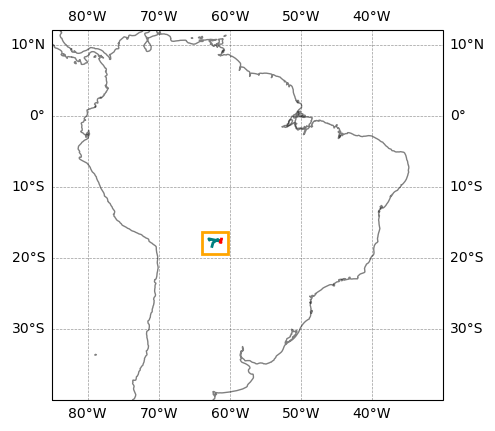

In [243]:
## finding matching MCSs to cell 20066 in cpm


min_lon = subset.longitude.min()-1
max_lon = subset.longitude.max() + 1
min_lat = subset.latitude.min() -1
max_lat = subset.latitude.max() +1

# finding the day of the subset cell
year = subset.datetime.dt.year.iloc[0]
month = subset.datetime.dt.month.iloc[0]
day = subset.datetime.dt.day.iloc[0]

# subsetting the all_years_cpm dataset down to just the specific day that the mcs occurs in the all_years_obs dataset
cpm_subset = all_years_cpm[all_years_cpm.datetime.dt.year == year]
cpm_subset = cpm_subset[cpm_subset.datetime.dt.month == month]
cpm_subset = cpm_subset[cpm_subset.datetime.dt.day == day]
print(np.unique(cpm_subset.cell.values))


# subsetting based on location
for cell in np.unique(cpm_subset.cell.values):
    new_subset = cpm_subset[cpm_subset.cell == cell]

    if new_subset.projection_x_coordinate.min() >= min_lon and new_subset.projection_x_coordinate.max() <= max_lon and new_subset.projection_y_coordinate.min() >= min_lat and new_subset.projection_y_coordinate.max() <= max_lat:
        print('Yes:', new_subset.cell.iloc[0])
        cpm = new_subset.cell.iloc[0]

        obs = subset.cell.iloc[0]

        i = 0
        matching_cells.loc[i] = [obs, cpm]
        i = i+1

    else:
        continue



# # print the cell numbers within the remaining subset
# obs = str(subset.cell.iloc[0])
# print(obs)
# if cpm_subset.shape[0] != 0:
#     cpm = str(cpm_subset.cell.iloc[0])
# else:
#     cpm = np.nan
# print(cpm)


# Plotting
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-85,-30,-40,12], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m',alpha=0.5)

# creating a grid box around the subset cell 
gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',linestyle='--')
ax.add_patch(mpatches.Rectangle(xy=[min_lon, min_lat], width=max_lon-min_lon, height=max_lat-min_lat, linewidth=2,
                                facecolor='none', edgecolor='orange',
                                transform=ccrs.PlateCarree()))
ax.plot(subset['longitude'],subset['latitude'], '-',linewidth=2,zorder=2, color='teal')
ax.plot(cpm_subset.projection_x_coordinate[cpm_subset.cell == 200636],cpm_subset.projection_y_coordinate[cpm_subset.cell == 200636], '-',linewidth=2, color='red')

# for cell in cpm_subset['cell'].dropna().unique():
#     if cell == -1:
#         continue
#     cpm_subset_i = cpm_subset[cpm_subset['cell'] == cell]
#     ax.plot(cpm_subset_i['projection_x_coordinate'],cpm_subset_i['projection_y_coordinate'], '-',linewidth=2, color='red')




**Code to loop over all unique MCS cells in all_years_obs and find any corresponding MCS cells in all_years_CPM**

In [245]:
## Testing on a single year (2005)
obs_2005 = all_years_obs[all_years_obs.datetime.dt.year == 2005]
obs_2005 = obs_2005[obs_2005.datetime.dt.month == 1]

In [246]:
obs_2005

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,datetime
16,0,630,1138.422052,573.577493,5632,240,17,2005-01-01 00:30:00,2005-01-01 00:30:00,1.416207,-69.116016,200517,0 days 00:00:00,2005-01-01 00:30:00
29,1,676,1140.948457,571.489735,5241,240,30,2005-01-01 01:30:00,2005-01-01 01:30:00,1.508131,-69.191963,200517,0 days 01:00:00,2005-01-01 01:30:00
36,2,342,629.706580,1034.420581,2780,240,37,2005-01-01 02:30:00,2005-01-01 02:30:00,-17.093756,-52.351313,200525,0 days 00:00:00,2005-01-01 02:30:00
40,2,589,926.875203,921.058459,9920,240,41,2005-01-01 02:30:00,2005-01-01 02:30:00,-6.281071,-56.475237,200527,0 days 00:00:00,2005-01-01 02:30:00
44,2,657,1124.263381,548.508988,3605,240,45,2005-01-01 02:30:00,2005-01-01 02:30:00,0.901034,-70.027967,200517,0 days 02:00:00,2005-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,741,915,951.251967,441.232979,9061,240,9535,2005-01-31 21:30:00,2005-01-31 21:30:00,-5.394106,-73.930490,20053216,0 days 02:00:00,2005-01-31 21:30:00
9544,742,605,665.778527,667.151433,7429,240,9545,2005-01-31 22:30:00,2005-01-31 22:30:00,-15.781254,-65.711952,20053235,0 days 01:00:00,2005-01-31 22:30:00
9552,742,875,964.621996,455.311644,9876,240,9553,2005-01-31 22:30:00,2005-01-31 22:30:00,-4.907628,-73.418328,20053216,0 days 03:00:00,2005-01-31 22:30:00
9561,743,542,665.384815,662.481108,6302,240,9562,2005-01-31 23:30:00,2005-01-31 23:30:00,-15.795579,-65.881852,20053235,0 days 02:00:00,2005-01-31 23:30:00


In [247]:
all_years_cpm

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,cell,time_cell,datetime,hour
3,0,59,467.425697,475.248321,2505,240,4,2001-01-01 00:30:00,2001-01-01 00:30:00,-21.109310,-65.792404,20014,0 days 00:00:00,2001-01-01 00:30:00,0
7,0,250,944.092760,356.449346,5259,240,8,2001-01-01 00:30:00,2001-01-01 00:30:00,-1.804295,-70.603751,20018,0 days 00:00:00,2001-01-01 00:30:00,0
11,0,282,1055.969597,1095.429759,8211,240,12,2001-01-01 00:30:00,2001-01-01 00:30:00,2.726720,-40.675040,200112,0 days 00:00:00,2001-01-01 00:30:00,0
12,0,308,1174.461816,202.533427,2448,240,13,2001-01-01 00:30:00,2001-01-01 00:30:00,7.525654,-76.837346,200113,0 days 00:00:00,2001-01-01 00:30:00,0
15,1,21,307.298431,1275.891606,2697,240,16,2001-01-01 01:30:00,2001-01-01 01:30:00,-27.594464,-33.366328,200114,0 days 00:00:00,2001-01-01 01:30:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102479,8758,219,944.340097,1163.375145,5789,240,102480,2007-12-31 22:30:00,2007-12-31 22:30:00,-1.794278,-37.923254,200723246,0 days 07:00:00,2007-12-31 22:30:00,22
102482,8759,2,182.943308,1187.443185,6927,240,102483,2007-12-31 23:30:00,2007-12-31 23:30:00,-32.630848,-36.948497,200723244,0 days 08:00:00,2007-12-31 23:30:00,23
102489,8759,141,730.307160,414.301126,2429,240,102490,2007-12-31 23:30:00,2007-12-31 23:30:00,-10.462610,-68.260755,200723233,0 days 12:00:00,2007-12-31 23:30:00,23
102492,8759,167,813.299209,973.130707,3777,240,102493,2007-12-31 23:30:00,2007-12-31 23:30:00,-7.101434,-45.628160,200723245,0 days 08:00:00,2007-12-31 23:30:00,23


In [296]:
## finding matching MCSs between obs and cpm in first year of 2005 
i = 0

for cell in np.unique(obs_2005.cell.values):
    subset = all_years_obs[all_years_obs.cell == cell]

    # finding the day of the subset cell
    year = subset.datetime.dt.year.iloc[0]
    month = subset.datetime.dt.month.iloc[0]
    day = subset.datetime.dt.day.iloc[0]

    # subsetting the all_years_cpm dataset down to just the specific day that the mcs occurs in the all_years_obs dataset
    cpm_subset = all_years_cpm[all_years_cpm.datetime.dt.year == year]
    cpm_subset = cpm_subset[cpm_subset.datetime.dt.month == month]
    cpm_subset = cpm_subset[cpm_subset.datetime.dt.day == day]


    # Finding a box +- 0.5^ around the track
    min_lon = subset.longitude.min()-0.5
    max_lon = subset.longitude.max() + 0.5
    min_lat = subset.latitude.min() -0.5
    max_lat = subset.latitude.max() +0.5

    # subsetting cpm_subset further to just mcss that are within the box above
    for cell in np.unique(cpm_subset.cell.values):
        new_subset = cpm_subset[cpm_subset.cell == cell]

        if new_subset.projection_x_coordinate.min() >= min_lon and new_subset.projection_x_coordinate.max() <= max_lon and new_subset.projection_y_coordinate.min() >= min_lat and new_subset.projection_y_coordinate.max() <= max_lat:
            print('Yes:', new_subset.cell.iloc[0])
            cpm = new_subset.cell.iloc[0]

            obs = subset.cell.iloc[0]

            matching_cells.loc[i] = [obs, cpm]
            i = i+1

        else:
            continue




Yes: 200564
Yes: 2005135
Yes: 200570
Yes: 2005309
Yes: 2005414
Yes: 2005441
Yes: 2005514
Yes: 2005551
Yes: 2005453
Yes: 2005587
Yes: 2005764
Yes: 2005940
Yes: 2005859
Yes: 2005937
Yes: 20051215
Yes: 20051209
Yes: 20051270
Yes: 20051215
Yes: 20051270
Yes: 20051322
Yes: 20051498
Yes: 20051435
Yes: 20051584
Yes: 20051767
Yes: 20051853
Yes: 20052140


In [297]:
matching_cells[matching_cells.CPM != 'NaN']

,Observations,CPM
0,2005137,200564
1,2005160,2005135
2,2005186,200570
3,2005398,2005309
4,2005449,2005414
5,2005564,2005441
6,2005641,2005514
7,2005876,2005551
8,2005911,2005453
9,20051057,2005587


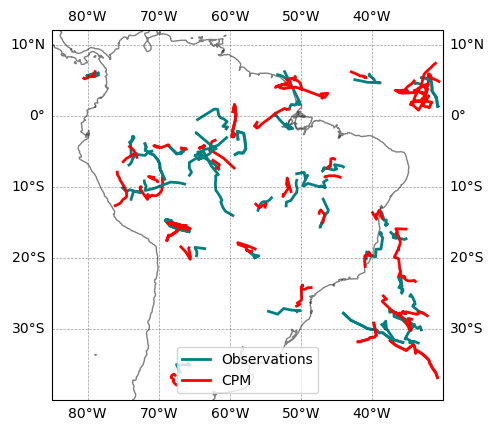

In [298]:
# Plotting
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-85,-30,-40,12], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m',alpha=0.5)

# creating a grid box around the subset cell 
gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',linestyle='--')
#ax.add_patch(mpatches.Rectangle(xy=[min_lon, min_lat], width=max_lon-min_lon, height=max_lat-min_lat, linewidth=2,
                                #facecolor='none', edgecolor='orange',
                                #transform=ccrs.PlateCarree()))
for i in np.arange(0, matching_cells.shape[0]):
    cell_obs = matching_cells.Observations.loc[i]
    cell_cpm = matching_cells.CPM.loc[i]
    ax.plot(all_years_obs.longitude[all_years_obs.cell == cell_obs],all_years_obs.latitude[all_years_obs.cell == cell_obs], '-',linewidth=2,zorder=2, color='teal')
    ax.plot(all_years_cpm.projection_x_coordinate[all_years_cpm.cell == cell_cpm],all_years_cpm.projection_y_coordinate[all_years_cpm.cell == cell_cpm], '-',linewidth=2, color='red')

# singular tracks to create legend from
ax.plot(all_years_obs.longitude[all_years_obs.cell == 20052426],all_years_obs.latitude[all_years_obs.cell == 20052426], '-',linewidth=2,zorder=2, color='teal',label='Observations')

ax.plot(all_years_cpm.projection_x_coordinate[all_years_cpm.cell == 20051584],all_years_cpm.projection_y_coordinate[all_years_cpm.cell == 20051584], '-',linewidth=2, color='red',label='CPM')

ax.legend(loc='best')

In [280]:
obs = all_years_obs[all_years_obs.cell == 20052426]
cpm = all_years_cpm[all_years_cpm.cell == 20051584]

In [281]:
obs

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,datetime
7067,546,529,692.875351,597.675200,2904,240,7068,2005-01-23 18:30:00,2005-01-23 18:30:00,-14.795317,-68.239385,20052426,0 days 00:00:00,2005-01-23 18:30:00
7080,547,428,698.299372,580.607328,3937,240,7081,2005-01-23 19:30:00,2005-01-23 19:30:00,-14.597959,-68.860285,20052426,0 days 01:00:00,2005-01-23 19:30:00
7098,548,411,696.416916,576.910916,5612,240,7099,2005-01-23 20:30:00,2005-01-23 20:30:00,-14.666455,-68.994749,20052426,0 days 02:00:00,2005-01-23 20:30:00
7115,549,365,690.787254,578.596239,6181,240,7116,2005-01-23 21:30:00,2005-01-23 21:30:00,-14.871293,-68.933442,20052426,0 days 03:00:00,2005-01-23 21:30:00
7133,550,336,694.807752,576.827759,8079,240,7134,2005-01-23 22:30:00,2005-01-23 22:30:00,-14.725004,-68.997774,20052426,0 days 04:00:00,2005-01-23 22:30:00
7148,551,342,673.798714,592.903810,4799,240,7149,2005-01-23 23:30:00,2005-01-23 23:30:00,-15.489433,-68.412954,20052426,0 days 05:00:00,2005-01-23 23:30:00
7164,552,568,660.590110,627.310332,4668,240,7165,2005-01-24 00:30:00,2005-01-24 00:30:00,-15.970037,-67.161303,20052426,0 days 06:00:00,2005-01-24 00:30:00
7178,553,395,651.576461,666.286279,2189,240,7179,2005-01-24 01:30:00,2005-01-24 01:30:00,-16.298007,-65.743424,20052426,0 days 07:00:00,2005-01-24 01:30:00


In [282]:
cpm

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,cell,time_cell,datetime,hour
6370,531,42,606.130244,465.409507,34403,240,6371,2005-01-23 03:30:00,2005-01-23 03:30:00,-15.491776,-66.190875,20051584,0 days 00:00:00,2005-01-23 03:30:00,3
6389,532,37,608.062459,445.662218,39576,240,6390,2005-01-23 04:30:00,2005-01-23 04:30:00,-15.413520,-66.990638,20051584,0 days 01:00:00,2005-01-23 04:30:00,4
6405,533,27,605.254909,440.351004,40331,240,6406,2005-01-23 05:30:00,2005-01-23 05:30:00,-15.527226,-67.205726,20051584,0 days 02:00:00,2005-01-23 05:30:00,5
6422,534,26,603.174151,435.108970,40133,240,6423,2005-01-23 06:30:00,2005-01-23 06:30:00,-15.611498,-67.418042,20051584,0 days 03:00:00,2005-01-23 06:30:00,6
6440,535,32,602.970544,430.576893,39086,240,6441,2005-01-23 07:30:00,2005-01-23 07:30:00,-15.619744,-67.601577,20051584,0 days 04:00:00,2005-01-23 07:30:00,7
6460,536,31,604.466815,426.811667,36551,240,6461,2005-01-23 08:30:00,2005-01-23 08:30:00,-15.559144,-67.754087,20051584,0 days 05:00:00,2005-01-23 08:30:00,8
6479,537,25,605.633321,428.033593,38016,240,6480,2005-01-23 09:30:00,2005-01-23 09:30:00,-15.511901,-67.704572,20051584,0 days 06:00:00,2005-01-23 09:30:00,9
6500,538,41,616.386278,402.023591,26516,240,6501,2005-01-23 10:30:00,2005-01-23 10:30:00,-15.076406,-68.757986,20051584,0 days 07:00:00,2005-01-23 10:30:00,10
6516,539,32,616.707534,409.846020,25098,240,6517,2005-01-23 11:30:00,2005-01-23 11:30:00,-15.063395,-68.441172,20051584,0 days 08:00:00,2005-01-23 11:30:00,11
6533,540,32,616.050206,421.938645,22233,240,6534,2005-01-23 12:30:00,2005-01-23 12:30:00,-15.090017,-67.951429,20051584,0 days 09:00:00,2005-01-23 12:30:00,12


In [276]:
import xarray as xr

In [279]:
# Load in corresponding Tb datasets for the MCSs
tb_cpm = xr.open_dataset('/data/users/hgilmour/tb/tb_2005.nc')
tb_cpm = tb_cpm.toa_outgoing_longwave_flux

tb_obs = xr.open_dataset('/scratch/hgilmour/obs/tb/annual_files_hrly/tb_2005.nc')
tb_obs  = tb_obs.Tb
